# Hometask №6 
## by Anton Kondrashov
##### HSE, CS, BSE 141(1)

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import scipy as sp
import math
from math import exp, log

## Optimization: GD vs SGD vs mini-batch SGD

In [ ]:
#1
def loss(W, X, y,gamma,beta):
    L = [sum([math.log(1 + math.exp(-np.dot(W, X[i]) * y[i])) for i in range(len(y))])]
    L1 = np.linalg.norm(W, 1)
    L2 = np.linalg.norm(W, 2)
    return L + gamma * L1  + beta * L2

def GD(X, y, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0, tol = 0.01):
    
    #init
    W = np.zeros(X.shape[1])
    lossHistory = [loss(W,X,y,gamma,beta)]
    tick = 0
    diff = tol + 1
    
    while not (tick == max_epoch):
        #gradient
        wcopy = W[:]
       
        gradient = [0] * len(W)
        for i in range(len(y)):
            for j in range(len(wcopy)):
                gradient[j] += y[i] * X[i][j] * (1 / (1 + math.exp(y[i] * np.dot(wcopy, X[i]))))
               
        for i in range(len(W)):
            W[i] -= (alpha/ len(y)) * (-gradient[i] + gamma * np.sign(wcopy[i])) 
        
        lossHistory.append(loss(W,X,y,gamma,beta))
        
        tick += 1
        diff = lossHistory[-2] - lossHistory[-1]
    
    return W, lossHistory
    
def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])


def SGD(X, y, batch_size = 1, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0):
    
    #init
    W = np.random.uniform(size=(X.shape[1],))
    lossHistory = []
    
    #train
    for epoch in range(max_epoch):
        
        epochLoss = []
        
        for (batchX, batchY) in next_batch(X, y, batch_size):
            
            wcopy = W[:]
            gradient = [0] * len(W)
            for i in range(len(batchY)):
                for j in range(len(wcopy)):
                    gradient[j] += batchY[i] * batchX[i][j] * (1 / (1 + math.exp(batchY[i] * np.dot(wcopy, batchX[i]))))
               
            for i in range(len(W)):
                W[i] -= (alpha/ len(batchY)) * (-gradient[i] + gamma * np.sign(wcopy[i]) + beta * 2 * wcopy[i]) 

            epochLoss.append(loss(W,batchX,batchY,gamma,beta))
            
        lossHistory.append(np.average(epochLoss))
    return W, lossHistory

In [ ]:
def with_constant_feature(X):
    return np.c_[np.ones((X.shape[0])), X]

In [ ]:
def show(X, y, L):
    print(W)
    Y = (-W[0] - (W[1] * X)) / W[2]
    plt.figure()
    plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
    plt.plot(X, Y, "r-")

    fig = plt.figure()
    plt.plot(np.arange(0, len(L)), L)
    fig.suptitle("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

In [ ]:
#GD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = GD(X,y)
show(X, y, l)

[ 0.9389212   1.17507159  1.3910698 ]


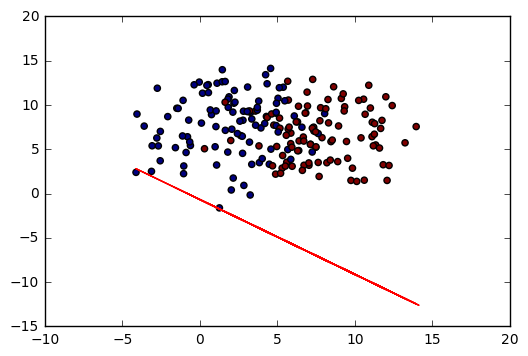

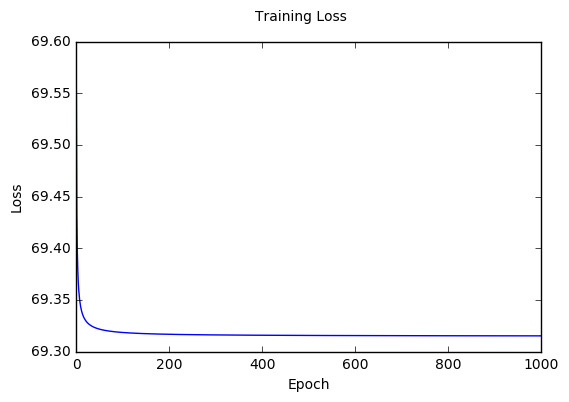

In [ ]:
#SGD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = SGD(X,y)
show(X, y, l)

In [ ]:
#mini-batch SGD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = SGD(X,y, batch_size=15)
show(X, y, l)

## Regularization

In [ ]:
import pickle
import pandas as pd
from sklearn import preprocessing, metrics

In [ ]:
data = pd.read_pickle('first_dataset.pkl')

In [ ]:
X, y, X_test, y_test = data['train_data'], data['train_labels'], data['test_data'], data['test_labels']

In [ ]:
#standardize and add a constant feature
standard = preprocessing.StandardScaler()

X = with_constant_feature(standard.fit_transform(X, y))
X_test = with_constant_feature(standard.transform(X_test))

In [ ]:
# no reg
w, L = GD(X, y)
show(X,y,L)

In [ ]:
# only L1
w, L = GD(X, y, gamma=0.25)
show(X,y,L)

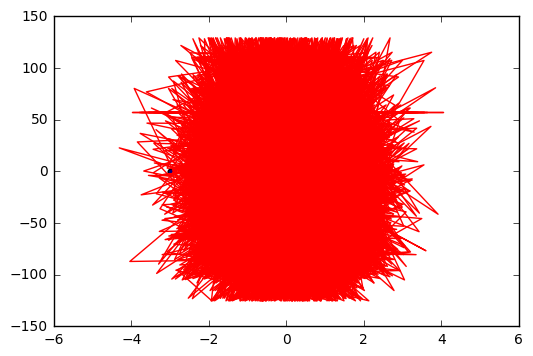

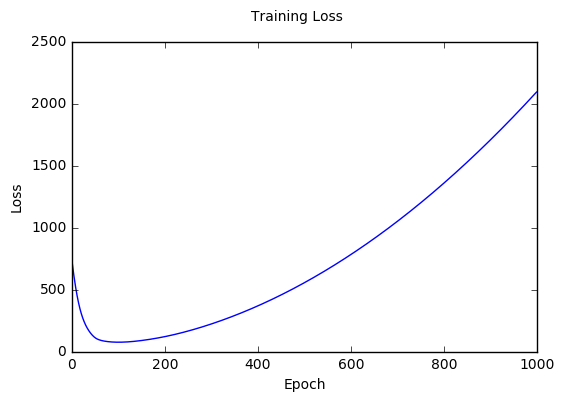

In [217]:
# only L2
w, L = GD(X, y, beta=0.25)
show(X,y,L)

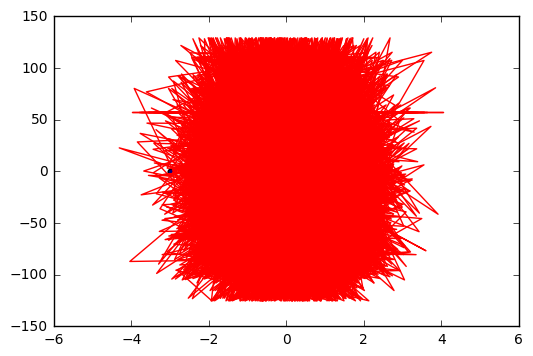

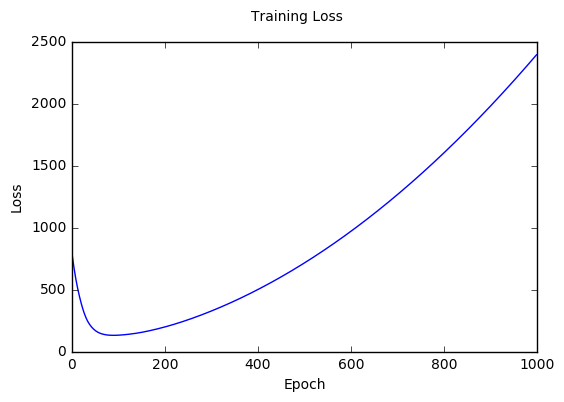

In [218]:
# both L1 and L2
w, L = GD(X, y, beta=0.25, gamma=0.25)
show(X,y,L)

## 2. Compare the results of the methods on the train and test data, explain the difference.

In [220]:
w, L = GD(X, y)
print(np.sort(w)[-2:])
w, L = GD(X, y, gamma=0.5)
print(np.sort(w)[-2:])

[  8.06377443  31.79743548]
[  8.11167674  31.62866649]


## Model evaluation

In [221]:
data = pd.read_pickle('diabetes.pkl')

In [222]:
X, y = data['data'], data['labels']

In [223]:
standard = preprocessing.StandardScaler()
X_data = with_constant_feature(standard.fit_transform(X, y))

In [226]:
w, L = SGD(X, y, alpha = 0.1, gamma = 0.2)

In [227]:
def prediction(w, X, a):
    return [np.sign((np.dot(w, obj)) - a) for obj in X]

In [228]:
matrix = metrics.confusion_matrix(y, prediction(w, X, 0.5))
print(matrix)

[[500   0]
 [268   0]]
